In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.signal import savgol_filter

In [2]:
path="/lustre/ytzheng/"
# path="C:/data/SAM_cases/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' +  '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
f = f.isel(time = slice(0, 61))
f1 = f1.isel(time = slice(0, 61))

f = f.where(f.time < 165. + (41./24.))

nt = f['time'].size
t_hours = np.arange(nt)

myfontsize = 12

In [4]:
def plt1D(ax, x, y, y1, ytitle, smooth=0
         ,xlabel = 1):
    if smooth == 0:
        ax.plot(x, y, linewidth=2, label = 'CADV', color = 'dodgerblue')
        ax.plot(x, y1, linewidth=2, label = 'WADV', linestyle = '-',color = 'crimson')
    else:
        ax.plot(x, y, linewidth=2, color = 'dodgerblue', alpha=0.2)
        ax.plot(x, y1, linewidth=2, linestyle = '-',color = 'crimson', alpha=0.2)
        
        yhat = savgol_filter(y, 15, 3)
        yhat1 = savgol_filter(y1, 15, 3)

        ax.plot(x, yhat, linewidth=2, label = 'CADV', color = 'dodgerblue')
        ax.plot(x, yhat1, linewidth=2, label = 'WADV', linestyle = '-',color = 'crimson')
        
    ax.grid(True)
    ax.set_xlim([0., nt-1])
    ax.set_ylabel(ytitle, fontsize=myfontsize)  # Add a y-label to the axes.
    if xlabel != 0:
        ax.set_xlabel('Time (hours)', fontsize=myfontsize)  # Add a y-label to the axes.

In [5]:
f

<xarray.Dataset>
Dimensions:               (time: 61, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 167.52083
Data variables:
    p                     (z, time) float32 dask.array<chunksize=(512, 61), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(61,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=

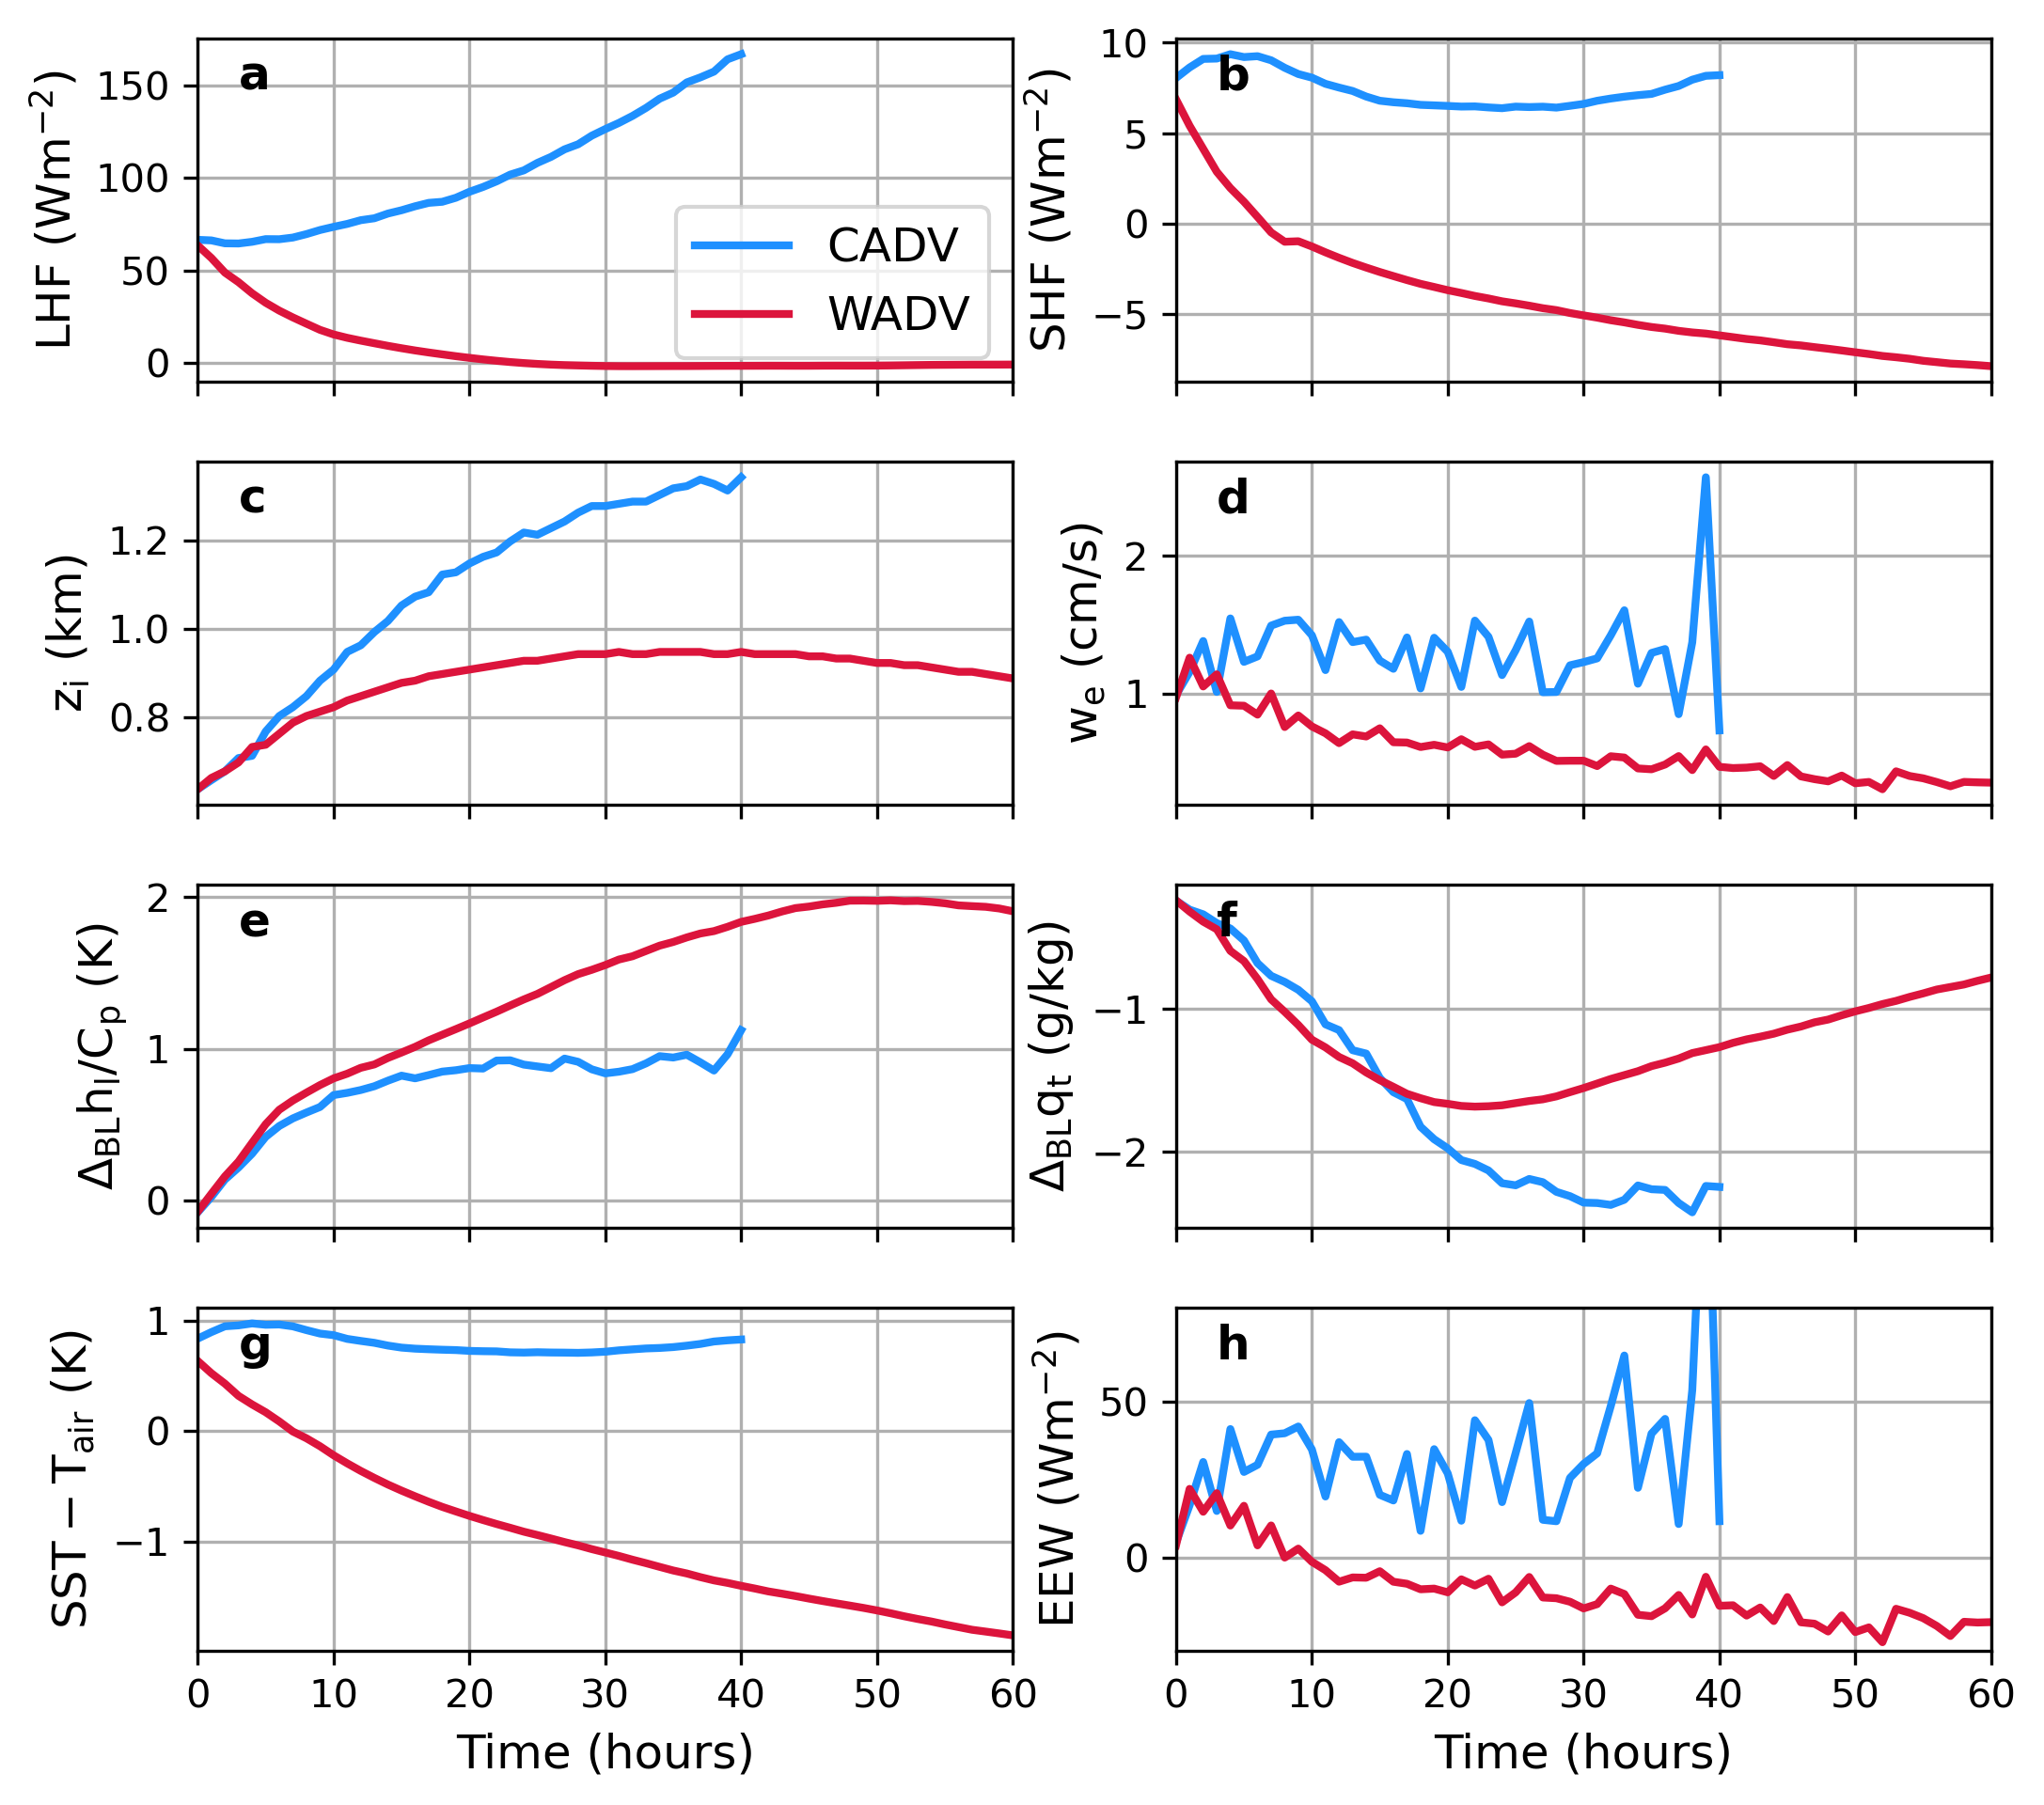

In [8]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 4,
                        sharex = True, sharey = False,
                        figsize=(18/2.54, (16)/2.54), dpi = 300)

plt.tight_layout()

plt1D(axs[0,0], t_hours, f['LHF'][0:nt], f1['LHF'][0:nt],
      r"$\mathrm{LHF \ (Wm^{-2})}$", xlabel = 0)
axs[0,0].legend(loc="best", fontsize=myfontsize)

plt1D(axs[0,1], t_hours, f['SHF'][0:nt], f1['SHF'][0:nt],
      r"$\mathrm{SHF \ (Wm^{-2})}$", xlabel = 0)

plt1D(axs[1,0], t_hours, f['zinvb'][0:nt]/1000., f1['zinvb'][0:nt]/1000.,
      r"$\mathrm{z_i \ (km)}$", xlabel = 0)

plt1D(axs[1,1], t_hours, 100.*f['we'][0:nt], 100.*f1['we'][0:nt],
      r"$\mathrm{w_e \ (cm/s)}$", xlabel = 0, smooth = 0)

plt1D(axs[2,0], t_hours, f['delta_thetal'][0:nt], f1['delta_thetal'][0:nt],
      r"$\mathrm{\Delta_{BL} h_l/C_p \ (K)}$", xlabel = 0)

plt1D(axs[2,1], t_hours, f['delta_qt'][0:nt], f1['delta_qt'][0:nt],
     r"$\mathrm{\Delta_{BL} q_t \ (g/kg)}$", xlabel = 0)

plt1D(axs[3,0], t_hours, f['SSTOBS'][0:nt]- f['TABS'][0:nt].isel(z=0),
      f1['SSTOBS'][0:nt]- f1['TABS'][0:nt].isel(z=0),
     r"$\mathrm{SST - T_{air} \ (K)}$")

plt1D(axs[3,1], t_hours, f['TVFLX_we_Wm2'] + f['Prec_wm2'] - f['CldRCool'],
      f1['TVFLX_we_Wm2'] + f1['Prec_wm2'] - f1['CldRCool'],
      r"$\mathrm{EEW \ (Wm^{-2})}$", smooth = 0)
axs[3,1].set_ylim([-30., 80])

mylabel = np.array((['a','b'],['c','d'], ['e','f'], ['g','h']))

for i in range(4):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

fig.savefig('plot_result_time_series.png', dpi=fig.dpi, bbox_inches='tight')

## Below are just for backup

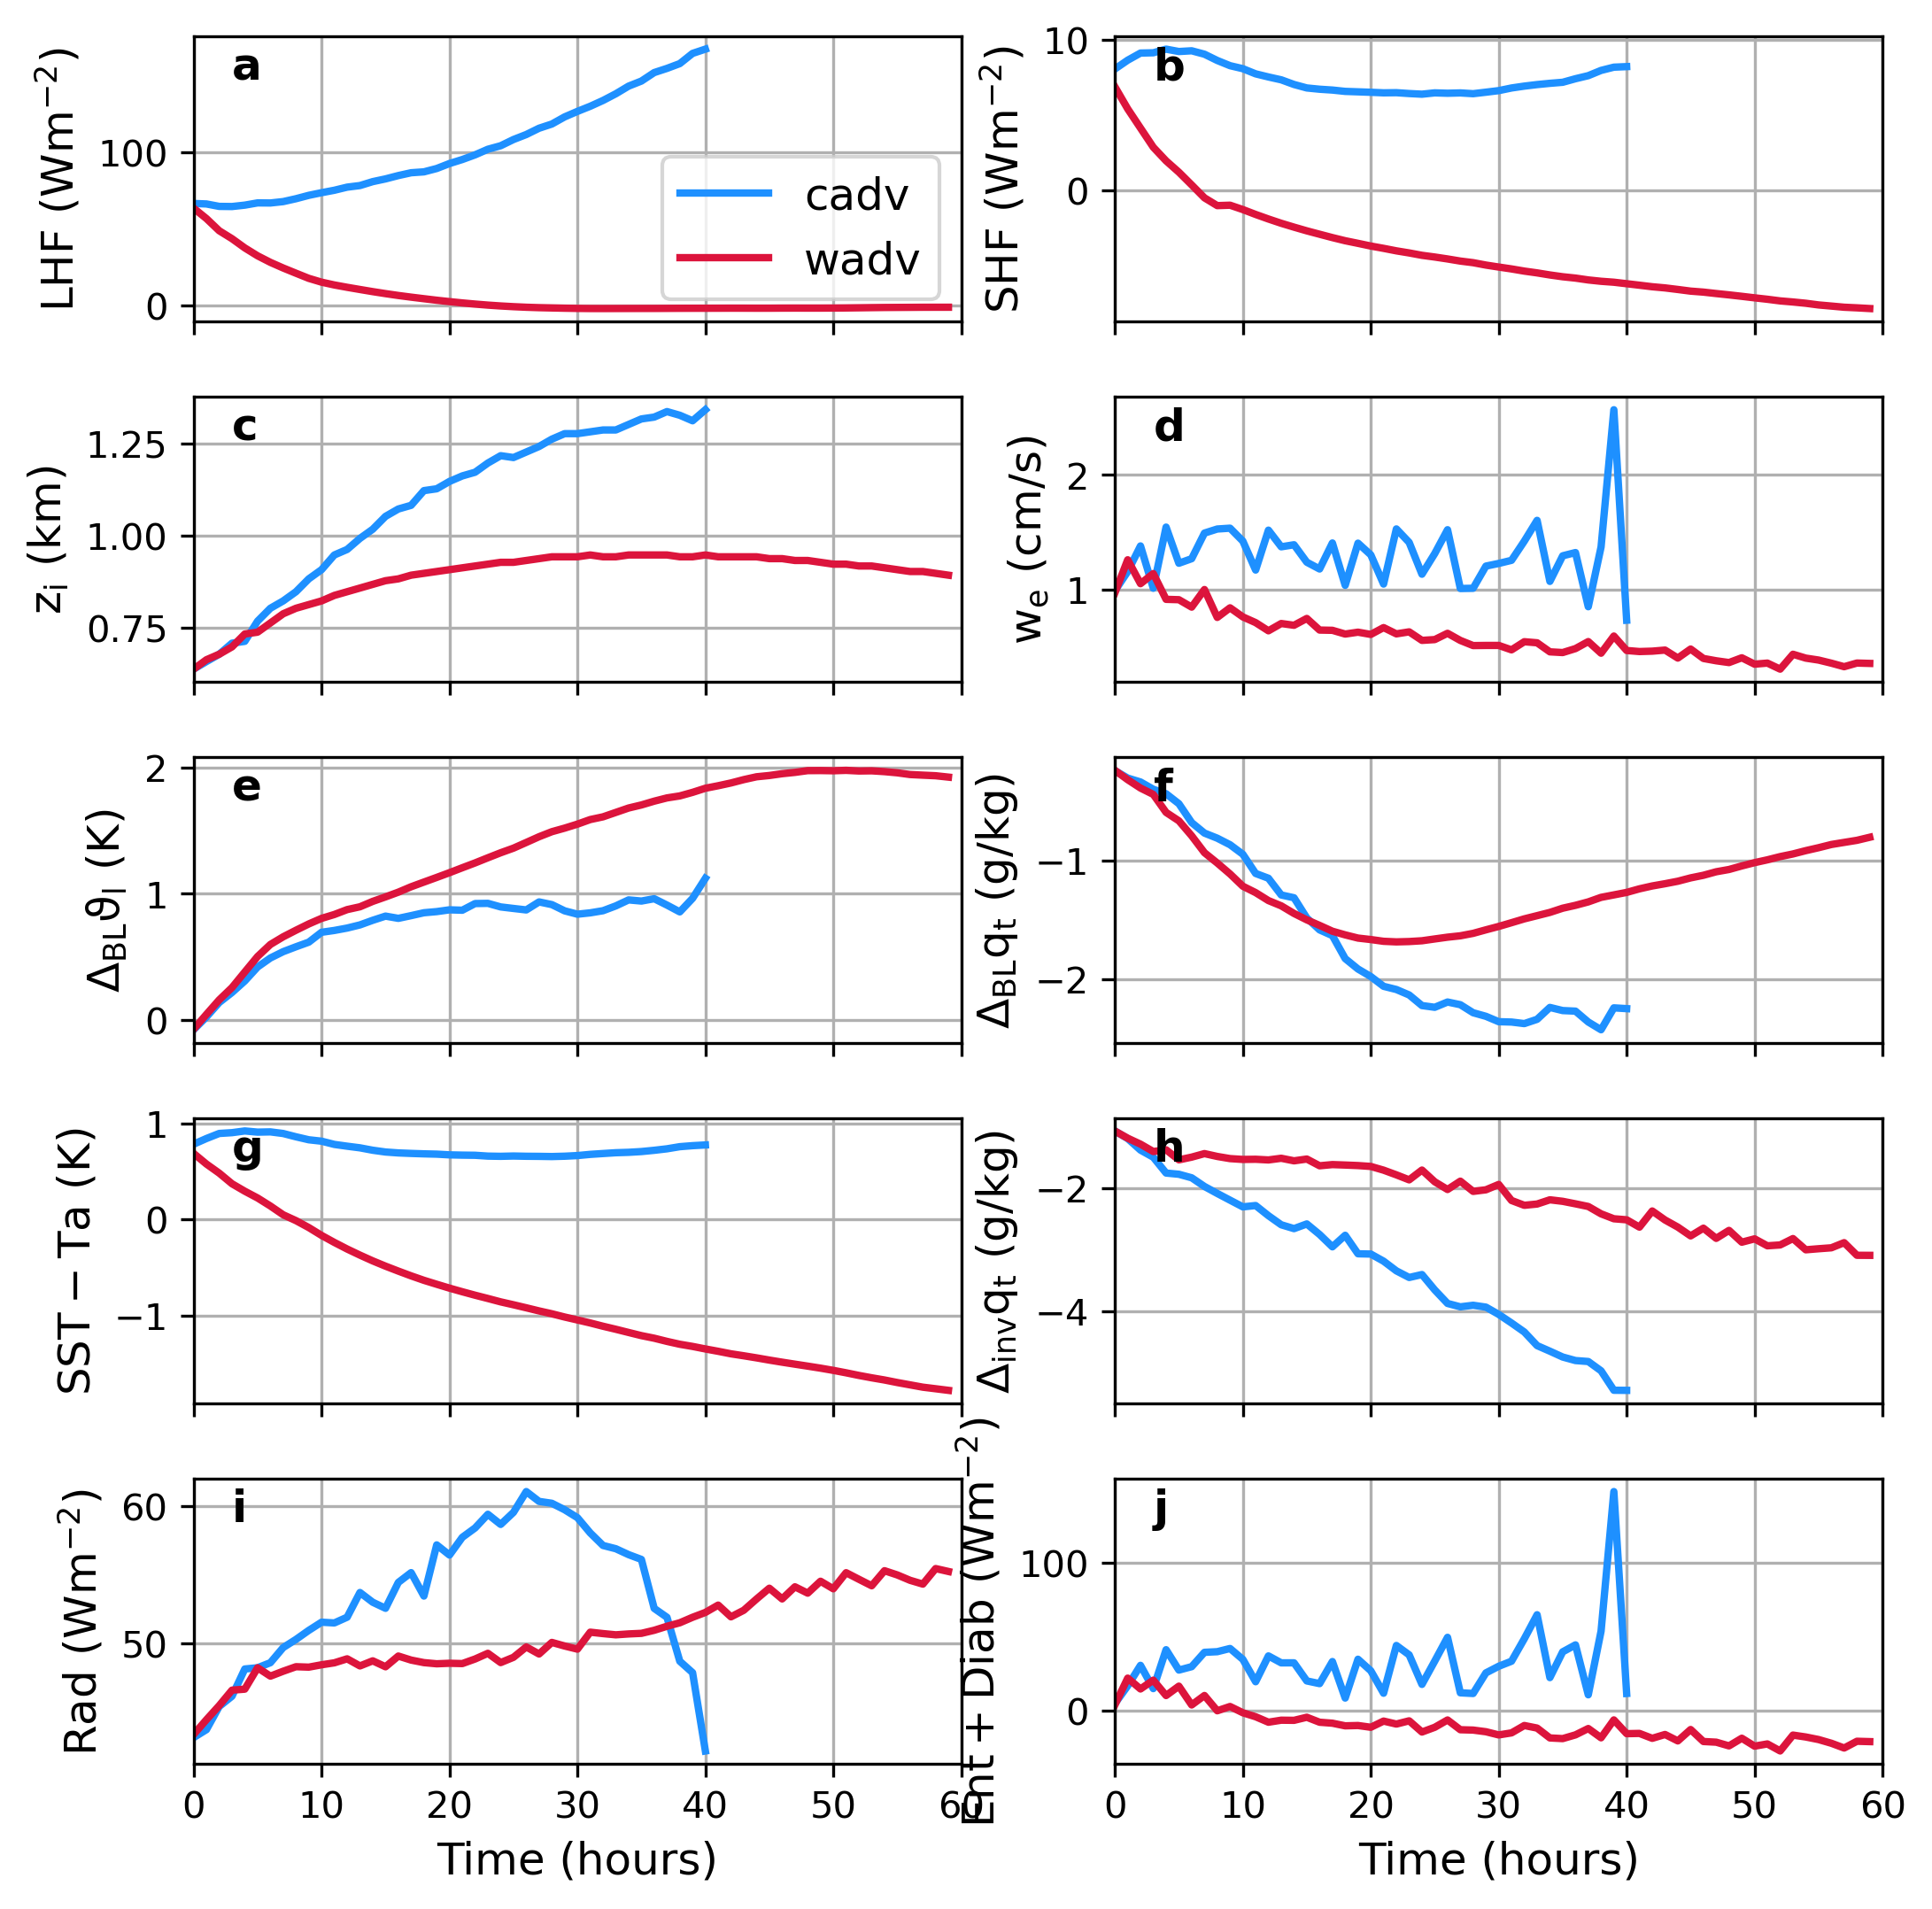

In [21]:
# fig, axs = plt.subplots(ncols = 2,
#                         nrows = 5,
#                         sharex = True, sharey = False,
#                         figsize=(18/2.54, (18)/2.54), dpi = 300)

# plt.tight_layout()

# plt1D(axs[0,0], t_hours, f['LHF'][0:nt], f1['LHF'][0:nt],
#       r"$\mathrm{LHF \ (Wm^{-2})}$", xlabel = 0)
# axs[0,0].legend(loc="best", fontsize=myfontsize)

# plt1D(axs[0,1], t_hours, f['SHF'][0:nt], f1['SHF'][0:nt],
#       r"$\mathrm{SHF \ (Wm^{-2})}$", xlabel = 0)

# plt1D(axs[1,0], t_hours, f['zinvb'][0:nt]/1000., f1['zinvb'][0:nt]/1000.,
#       r"$\mathrm{z_i \ (km)}$", xlabel = 0)

# plt1D(axs[1,1], t_hours, 100.*f['we'][0:nt], 100.*f1['we'][0:nt],
#       r"$\mathrm{w_e \ (cm/s)}$", xlabel = 0, smooth = 0)

# plt1D(axs[2,0], t_hours, f['delta_thetal'][0:nt], f1['delta_thetal'][0:nt],
#       r"$\mathrm{\Delta_{BL} \vartheta_l \ (K)}$", xlabel = 0)

# plt1D(axs[2,1], t_hours, f['delta_qt'][0:nt], f1['delta_qt'][0:nt],
#      r"$\mathrm{\Delta_{BL} q_t \ (g/kg)}$", xlabel = 0)

# plt1D(axs[3,0], t_hours, f['SST'] - f['TABS'].isel(z=0), f1['SST'] - f1['TABS'].isel(z=0),
#       r"$\mathrm{SST - Ta \ (K)}$", xlabel = 0)

# # plt1D(axs[3,0], t_hours, f['thl_zinvt'] - f['thl_zinvb'], f1['thl_zinvt'] - f1['thl_zinvb'],
# #       r"$\mathrm{\Delta_{inv} \vartheta_l \ (K)}$", xlabel = 0)

# plt1D(axs[3,1], t_hours, 1000.*(f['qt_zinvt'] - f['qt_zinvb']), 1000.*(f1['qt_zinvt'] - f1['qt_zinvb']),
#       r"$\mathrm{\Delta_{inv} q_t \ (g/kg)}$", xlabel = 0)

# plt1D(axs[4,0], t_hours, f['CldRCool'][0:nt], f1['CldRCool'][0:nt],
#       r"$\mathrm{Rad \ (Wm^{-2})}$")

# # plt1D(axs[2,1], t_hours, f['WMAX'][0:nt], f1['WMAX'][0:nt],
# #       r"$\mathrm{w_{max} \ (m/s)}$", xlabel = 0)

# plt1D(axs[4,1], t_hours, f['TVFLX_we_Wm2'] + f['Prec_wm2'] - f['CldRCool'],
#       f1['TVFLX_we_Wm2'] + f1['Prec_wm2'] - f1['CldRCool'],
#       r"$\mathrm{Ent + Diab \ (Wm^{-2})}$", smooth = 0)

# mylabel = np.array((['a','b'],['c','d'], ['e','f'], ['g','h'], ['i','j']))

# for i in range(5):
#     for j in range (2):
#         axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

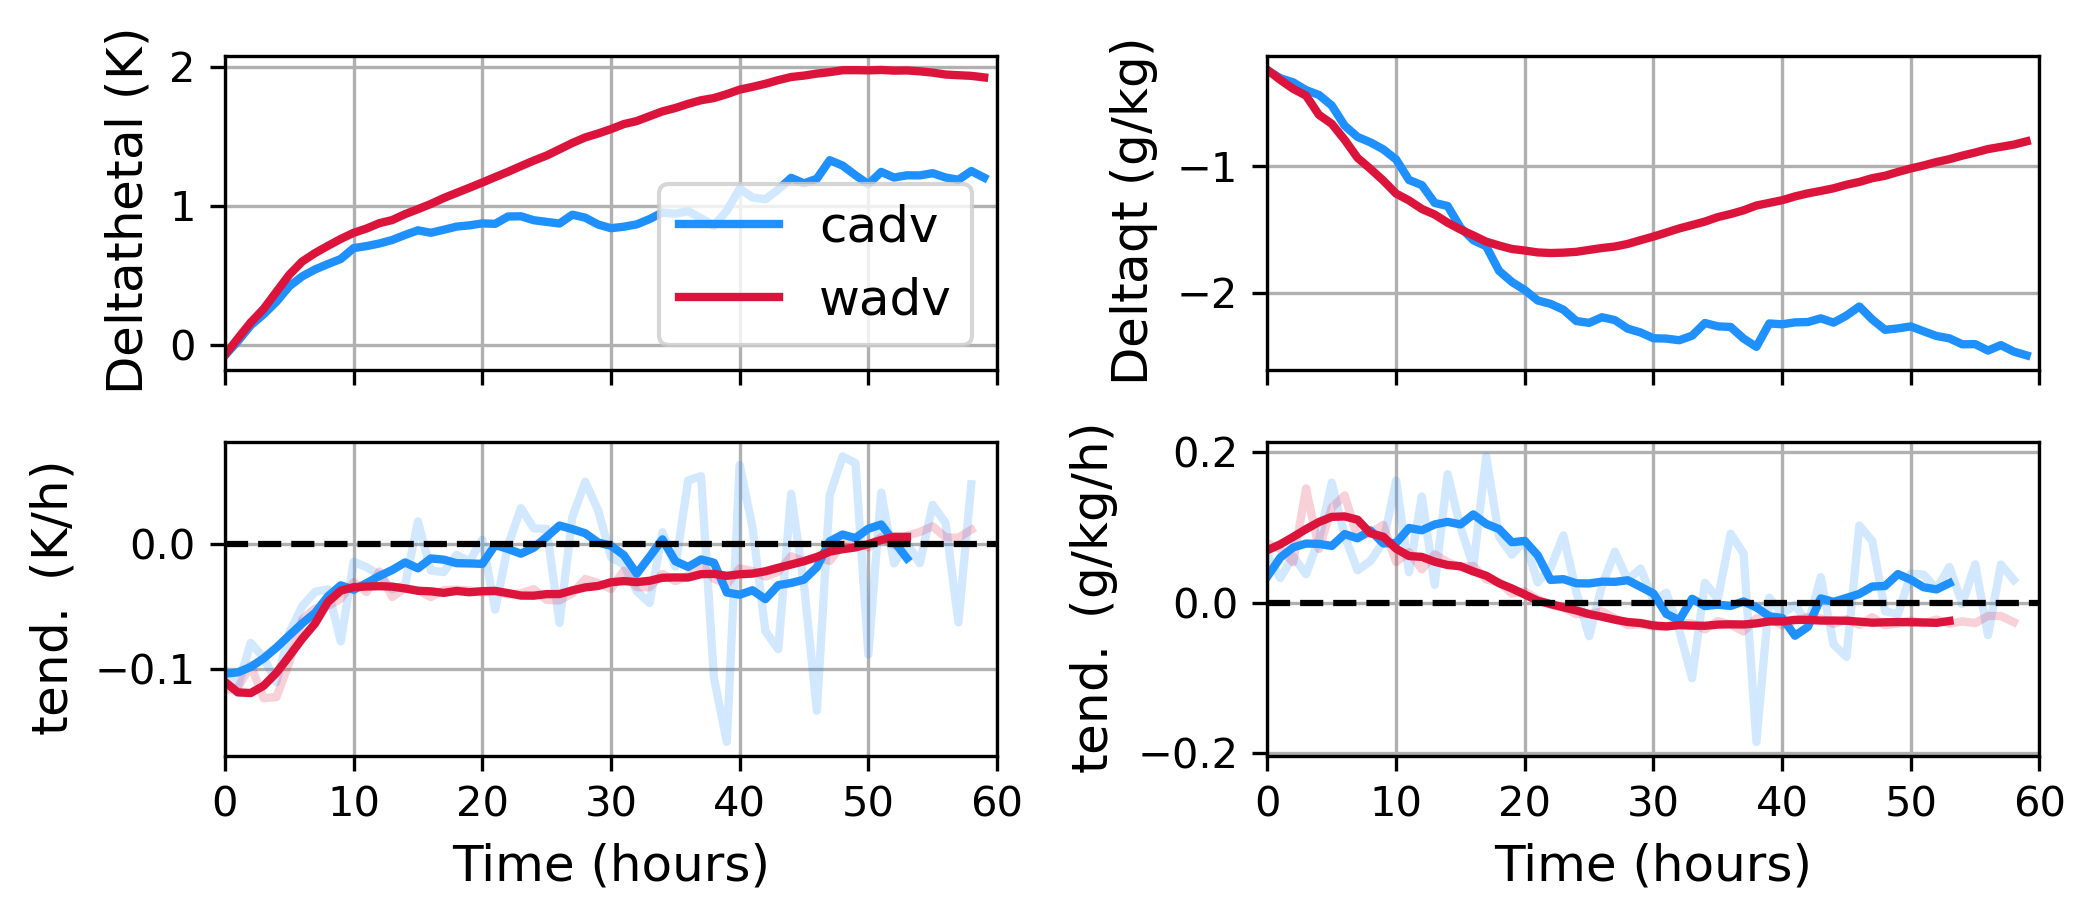

In [26]:
# fig, axs = plt.subplots(ncols = 2,
#                         nrows = 2,
#                         sharex = True, sharey = False,
#                         figsize=(18/2.54, (8)/2.54), dpi = 300)

# plt1D(axs[0,0], t_hours, f['delta_thetal'][0:nt], f1['delta_thetal'][0:nt],
#       r"$\mathrm{Delta thetal \ (K)}$", xlabel = 0)
# axs[0,0].legend(loc="best", fontsize=myfontsize)

# plt1D(axs[0,1], t_hours, f['delta_qt'][0:nt], f1['delta_qt'][0:nt],
#      r"$\mathrm{Delta qt \ (g/kg)}$", xlabel = 0)

# plt1D(axs[1,0], t_hours,(f['delta_thetal'] - f['delta_thetal'].shift(time = -1)), 
#       (f1['delta_thetal'] - f1['delta_thetal'].shift(time = -1)),
#       r"$\mathrm{tend. \ (K/h)}$", smooth =  1)

# axs[1,0].axhline(y=0,linestyle='--',color = 'black')


# plt1D(axs[1,1], t_hours,(f['delta_qt'] - f['delta_qt'].shift(time = -1)), 
#       (f1['delta_qt'] - f1['delta_qt'].shift(time = -1)),
#       r"$\mathrm{tend. \ (g/kg/h)}$", smooth =  1)

# axs[1,1].axhline(y=0,linestyle='--',color = 'black')


# plt.tight_layout()